In [35]:
## Libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
# Dataset
data_h = pd.read_csv('kc_house_data.csv')
data_h

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
print(data_h.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [5]:
print(data_h.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
print(data_h.describe()) 

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

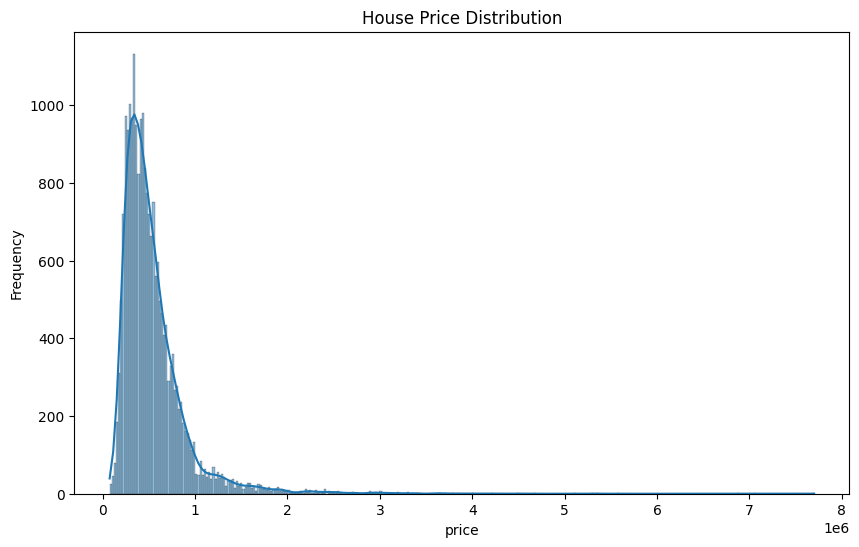

In [8]:
## Data visualization
plt.figure(figsize=(10, 6)) 
sns.histplot(data_h['price'], kde=True) 
plt.title('House Price Distribution') 
plt.xlabel('price') 
plt.ylabel('Frequency') 
plt.show() 

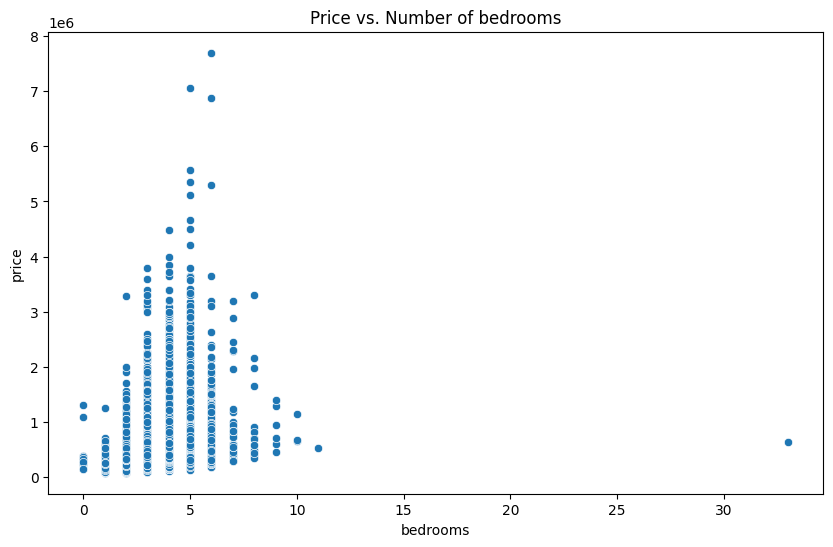

In [12]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='bedrooms', y='price', data=data_h) 
plt.title('Price vs. Number of bedrooms') 
plt.show() 

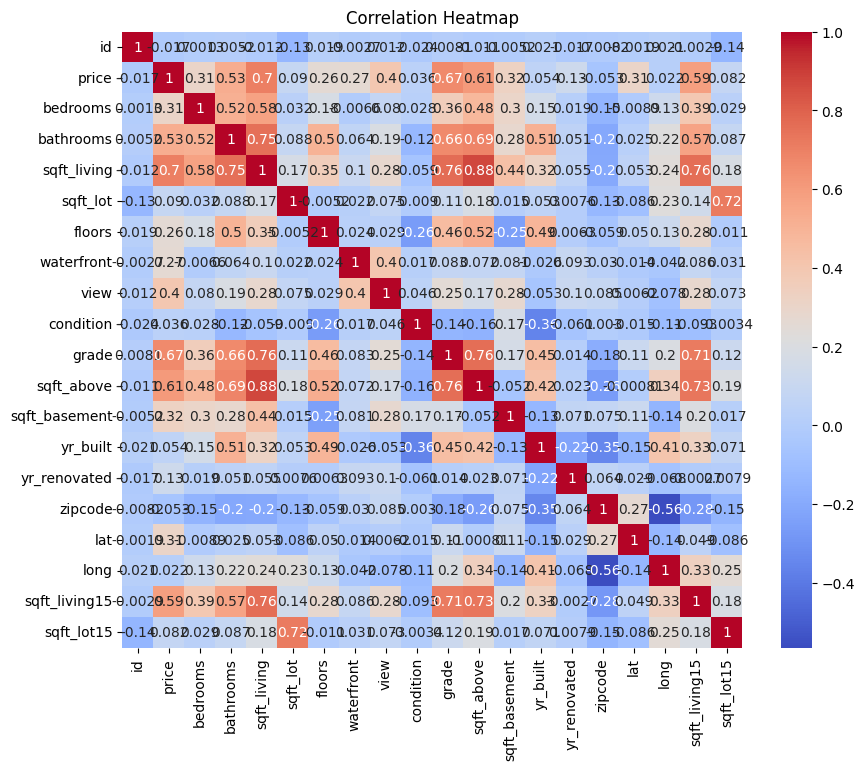

In [14]:
# Correlation heatmap 
plt.figure(figsize=(10, 8)) 
correlation_matrix = data_h.corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 
plt.title('Correlation Heatmap') 
plt.show() 

In [15]:
## Data Preprocessing
# Removing duplicate 
data_h.drop_duplicates(inplace=True) 

In [16]:
# Selecting the features and target variable
features1 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
target = 'price'
X1 = data_h[features1]
y1 = data_h[target]

In [20]:
# We will perform the data splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [21]:
# instance of the Linear Regression model creation 
model = LinearRegression()

In [22]:
# Training the model
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [25]:
# Evaluating the model
score = model.score(X_test, y_test)
print("Model R^2 Score:", score)

Model R^2 Score: 0.5152176902631012


In [31]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 172878.75440069882


In [32]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 73287795746.30948


In [28]:
bedrooms = float(input("Enter the number of bedrooms: "))
bathrooms = float(input("Enter the number of bathrooms: "))
sqft_living = float(input("Enter the square footage of living area: "))
sqft_lot = float(input("Enter the square footage of lot: "))
floors = float(input("Enter the number of floors: "))
zipcode = float(input("Enter the zipcode: "))

# Create a DataFrame for the new house
new_house = pd.DataFrame({'bedrooms': [bedrooms], 'bathrooms': [bathrooms], 'sqft_living': [sqft_living], 'sqft_lot': [sqft_lot], 'floors': [floors], 'zipcode': [zipcode]})

predicted_price = model.predict(new_house)

print("Predicted Price:", predicted_price[0])

Enter the number of bedrooms: 2
Enter the number of bathrooms: 2.5
Enter the square footage of living area: 600
Enter the square footage of lot: 600
Enter the number of floors: 2
Enter the zipcode: 98008
Predicted Price: 121215.61449578404


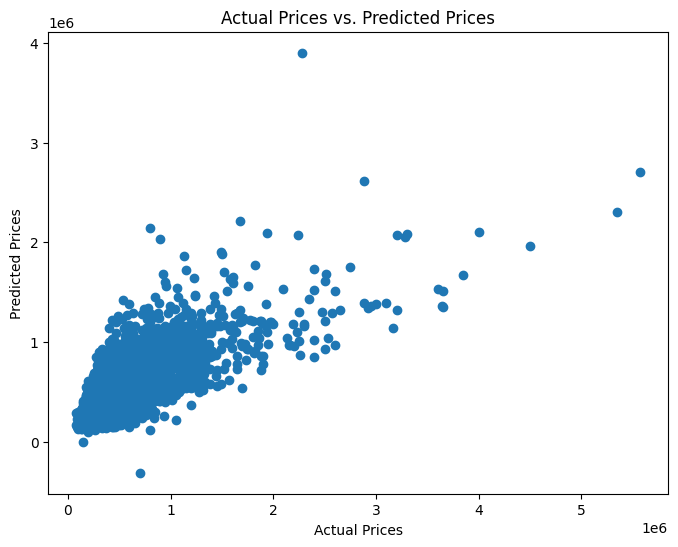

In [33]:
# Scatter plot of predicted vs. actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

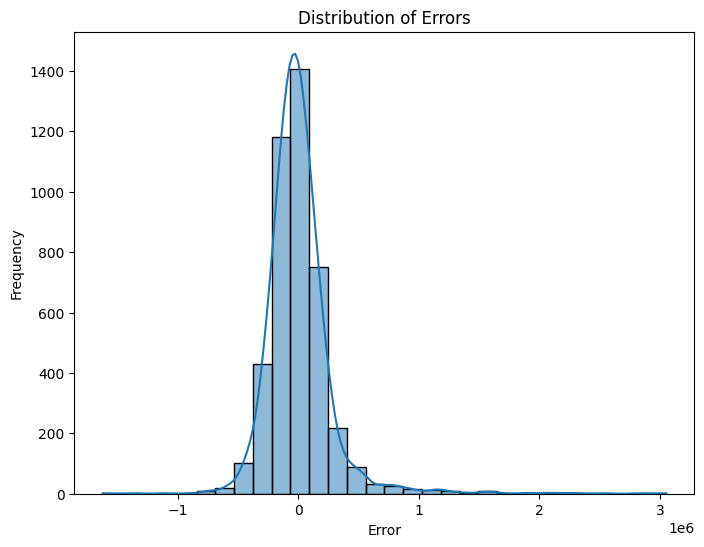

In [34]:
# Distribution of errors (Residuals)
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Distribution of Errors")
plt.show()